<h1 align="center">Machine Learning and Vision Lab</h1>
<h4 align="center">Dr. Mohammadzadeh</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Amir Hossein Yari - 99102507</h4>
<h4 align="center">Lab 2 - Linear Regression</h4>

<h3 align="left">Linear regression with a limited number of features</h3>

<h4 align="left">Part 1</h4>

In [6]:
# Import required packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import os
import cv2
from sklearn.decomposition import PCA

In [7]:
# read csv file
df = pd.read_csv("ozon.csv")

# Specify the features and the target variable
X = df.drop(columns=['ozone'])
y = df['ozone']

In [18]:
num_iterations = 10

# Lists to store coefficients and intercepts from multiple runs
coefficients_list = []
intercepts_list = []

for _ in range(num_iterations):
    # Split the data into training and test sets with a different random state in each iteration
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(1, 1000))
    
    # Create a LinearRegression model
    model = LinearRegression()

    # Fit the model to the training set
    model.fit(X_train, y_train)

    # Get the coefficients and intercept of the model
    coefficients = model.coef_
    intercept = model.intercept_

    # Append the coefficients and intercept to the lists
    coefficients_list.append(coefficients)
    intercepts_list.append(intercept)

# Calculate the mean of coefficients and intercept
mean_coefficients = np.mean(coefficients_list, axis=0)
mean_intercept = np.mean(intercepts_list)

# Print the mean linear equation
equation = "y = {:.2f}".format(mean_intercept)
for i, coefficient in enumerate(mean_coefficients):
    equation += " + {:.2f} * x^{}".format(coefficient, i + 1)

print(equation)

y = -64.10 + 0.06 * x^1 + 1.64 * x^2 + -3.37 * x^3


In [27]:
# Define the number of iterations
num_iterations = 10

# Lists to store MSE values from multiple runs
mse_train_list = []
mse_test_list = []

for _ in range(num_iterations):
    # Split the data into training and test sets with a different random state in each iteration
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(1, 1000))
    
    # Create a LinearRegression model
    model = LinearRegression()

    # Fit the model to the training set
    model.fit(X_train, y_train)

    # Predict y for both the training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the MSE for both sets
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # Append the MSE values to the lists
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

# Calculate the mean MSE for training and test sets
mean_mse_train = np.mean(mse_train_list)
mean_mse_test = np.mean(mse_test_list)

print("Mean MSE for training set:", mean_mse_train)
print("Mean MSE for test set:", mean_mse_test)


Mean MSE for training set: 420.28725986853516
Mean MSE for test set: 498.75233255520345


<h4 align="left">Part 2</h4>

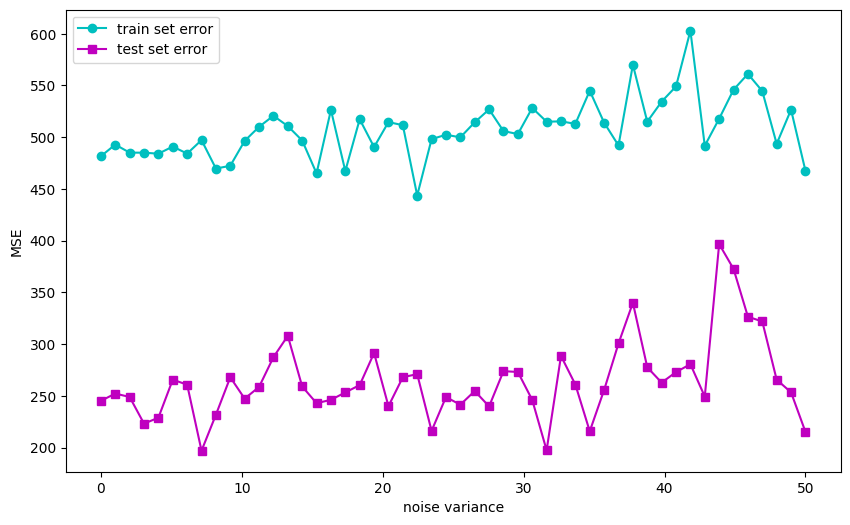

In [28]:
# Define variances
variances = np.linspace(0, 50, 50)

train_errors = []
test_errors = []

for variance in variances:
    # Generate noise
    noise = np.random.normal(0, np.sqrt(variance), len(df))

    # Add noise
    noised_ozone = df['ozone'] + noise

    # Create noisy dataframe
    noised_df = df.copy()
    noised_df['ozone'] = noised_ozone

    # Split noisy dataframe to train and test set
    X_noised = noised_df.drop(columns=['ozone'])
    y_noised = noised_df['ozone']
    X_train_noised, X_test_noised, y_train_noised, y_test_noised = train_test_split(X_noised, y_noised, test_size=0.2, random_state=42)

    # Create a LinearRegression model
    model_noised = LinearRegression()

    # Fit the model to training set
    model_noised.fit(X_train_noised, y_train_noised)

    # Calculate MSE for training set and test set
    y_train_pred_noised = model_noised.predict(X_train_noised)
    train_error = mean_squared_error(y_train_noised, y_train_pred_noised)
    y_test_pred_noised = model_noised.predict(X_test_noised)
    test_error = mean_squared_error(y_test_noised, y_test_pred_noised)

    # Add error to list
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(variances, train_errors, label='train set error', marker='o', color='c')
plt.plot(variances, test_errors, label='test set error', marker='s', color='m')
plt.xlabel('noise variance')
plt.ylabel('MSE')
plt.legend()
plt.show()


<span style="color: green;">
As you see for training, the error increases with increasing noise, but in test set it is not correct.<br>
The reason for this is that the model is trained with train data and the model cannot be given well when it is noisy.<br>
In test set that the model has not seen in normal mode, it does not matter if the amount of noise becomes very high and the regressor is not a good model for behavioral description.
</span>

<h4 align="left">Part 3</h4>

In [32]:
# Define the number of iterations
num_iterations = 10

# Lists to store coefficients and intercepts from multiple runs
coefficients_list = []
intercepts_list = []

for _ in range(num_iterations):
    # Split the data into training and test sets with a different random state in each iteration
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(1, 1000))
    
    # Add power to the training and test matrices
    train_x_extended = np.concatenate((X_train, X_train ** 2), axis=1)
    test_x_extended = np.concatenate((X_test, X_test ** 2), axis=1)

    # Create a LinearRegression model
    model = LinearRegression()

    # Fit the model to the extended training set
    model.fit(X=train_x_extended, y=y_train)

    # Get the coefficients and intercept of the model
    coefficients = model.coef_
    intercept = model.intercept_

    # Append the coefficients and intercept to the lists
    coefficients_list.append(coefficients)
    intercepts_list.append(intercept)

# Calculate the mean of coefficients and intercept
mean_coefficients = np.mean(coefficients_list, axis=0)
mean_intercept = np.mean(intercepts_list)

# Print the mean linear equation
equation = "y = {:.2f}".format(mean_intercept)
for i, coefficient in enumerate(mean_coefficients):
    equation += " + {:.2f} * x^{}".format(coefficient, i + 1)

print(equation)


y = 307.11 + 0.13 * x^1 + -6.95 * x^2 + -12.73 * x^3 + -0.00 * x^4 + 0.05 * x^5 + 0.44 * x^6


In [34]:
num_iterations = 10

# Lists to store MSE values from multiple runs
mse_train_list = []
mse_test_list = []

for _ in range(num_iterations):
    # Split the data into training and test sets with a different random state in each iteration
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(1, 1000))
    
    # Add power to the training and test matrices
    train_x_extended = np.concatenate((X_train, X_train ** 2), axis=1)
    test_x_extended = np.concatenate((X_test, X_test ** 2), axis=1)

    # Create a LinearRegression model
    model = LinearRegression()

    # Fit the model to the extended training set
    model.fit(X=train_x_extended, y=y_train)

    # Predict y for both the training and test sets
    y_train_pred = model.predict(train_x_extended)
    y_test_pred = model.predict(test_x_extended)

    # Calculate the MSE for both sets
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # Append the MSE values to the lists
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

# Calculate the mean MSE for training and test sets
mean_mse_train = np.mean(mse_train_list)
mean_mse_test = np.mean(mse_test_list)

print("Mean MSE for training set:", mean_mse_train)
print("Mean MSE for test set:", mean_mse_test)


Mean MSE for training set: 314.22128981789643
Mean MSE for test set: 333.9491455567116


<h3 align="left">Linear regression with high number of features</h3>

<h4 align="left">Part 1</h4>

In [35]:
# Define the main directory
main_directory = "surprise videos"

# List all subdirectories within the main directory
dirs = os.listdir(main_directory)

x = {}
y = {}

for sub_dir in dirs:
    # Construct the full directory path by joining the main directory and subdirectory
    dir_path = os.path.join(main_directory, sub_dir)
    images = os.listdir(dir_path)
    # Store file paths in x and calculate normalized values for y
    x[dir_path] = [os.path.join(dir_path, file) for file in images]
    y[dir_path] = [idx / (len(images) - 1) for idx in range(len(images))]


In [36]:
# Split the directories into a training set and a test set
train_dirs, test_dirs = train_test_split(dirs, test_size=0.4, random_state=42)

x_train = []
y_train = []
x_test = []
y_test = []

for sub_dir in dirs:
    dir_path = os.path.join(main_directory, sub_dir)
    images = os.listdir(dir_path)

    # Load and flatten the images
    flattened_images = [plt.imread(os.path.join(dir_path, file))[:, :, 0].flatten() for file in images]
    
    # Create the corresponding y values
    y_values = [idx / (len(images) - 1) for idx in range(len(images))]
    
    if sub_dir in train_dirs:
        x_train.extend(flattened_images)
        y_train.extend(y_values)
    else:
        x_test.extend(flattened_images)
        y_test.extend(y_values)

# Convert the lists to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)


In [4]:
# Create a LinearRegression model
model = LinearRegression()

# Fit the model to training set
model.fit(x_train, y_train)

<span style="color: green;">
Due to the large number of pixels, the training becomes very long and takes too much memory from the system and get an error!<br>
So training is not possible.
</span>

<h4 align="left">Part 2</h4>

In [37]:
# Split the directories into a training set and a test set
train_dirs, test_dirs = train_test_split(dirs, test_size=0.4, random_state=42)

x_train_crop_scale = []
y_train_crop_scale = []
x_test_crop_scale = []
y_test_crop_scale = []

# Define the cropping region
crop_region = (55, 790, 320, 870)

# Define the scaled image size
new_size = (110, 147)

for sub_dir in dirs:
    dir_path = os.path.join(main_directory, sub_dir)
    images = os.listdir(dir_path)

    # Load, flatten, crop, and scale the images
    for idx, image_name in enumerate(images):
        image = plt.imread(os.path.join(dir_path, image_name))[:, :, 0]
        
        # Crop the image
        cropped = image[crop_region[0]:crop_region[1], crop_region[2]:crop_region[3]]

        # Scale the cropped image
        scaled = cv2.resize(cropped, new_size)

        # Append the flattened and scaled image to the appropriate list
        if sub_dir in train_dirs:
            x_train_crop_scale.append(scaled.reshape(-1))
            y_train_crop_scale.append(idx / (len(images) - 1))
        else:
            x_test_crop_scale.append(scaled.reshape(-1))
            y_test_crop_scale.append(idx / (len(images) - 1))

# Convert the lists to NumPy arrays
x_train_crop_scale = np.array(x_train_crop_scale)
y_train_crop_scale = np.array(y_train_crop_scale)
x_test_crop_scale = np.array(x_test_crop_scale)
y_test_crop_scale = np.array(y_test_crop_scale)

In [38]:
# Create a LinearRegression model
model = LinearRegression()

# Fit the model to training set
model.fit(x_train_crop_scale, y_train_crop_scale)

# Predict y of train and test set
y_train_pred = model.predict(x_train_crop_scale)
y_test_pred = model.predict(x_test_crop_scale)

# Calculate MSE of train and test set
mse_train = mean_squared_error(y_train_crop_scale, y_train_pred)
mse_test = mean_squared_error(y_test_crop_scale, y_test_pred)

print(f"train error = {mse_train}")
print(f"test error = {mse_test}")

train error = 2.9057712757842006e-11
test error = 0.45184016707829366


<span style="color: green;">
From the comparison of these two errors, we can conclude that overfit has occurred.
</span>

<h4 align="left">Part 3</h4>

In [39]:
# Perform pca with 50 component
pca = PCA(n_components=50)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to training set
model.fit(x_train_pca, y_train)

# Predict y of train and test set
y_train_pred = model.predict(x_train_pca)
y_test_pred = model.predict(x_test_pca)

# Calculate MSE of train and test set
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"train error = {mse_train}")
print(f"test error = {mse_test}")

train error = 0.005128086795927372
test error = 0.18238719309662987


<span style="color: green;">
You can see that by applying PCA, the training error increases and the test error decreases. This means that there is less overfit compared to the previous state and the model function is better. <br> This is because dimensionality reduction with PCA preserves the original components, but cropping and scaling do not necessarily do so.
</span>

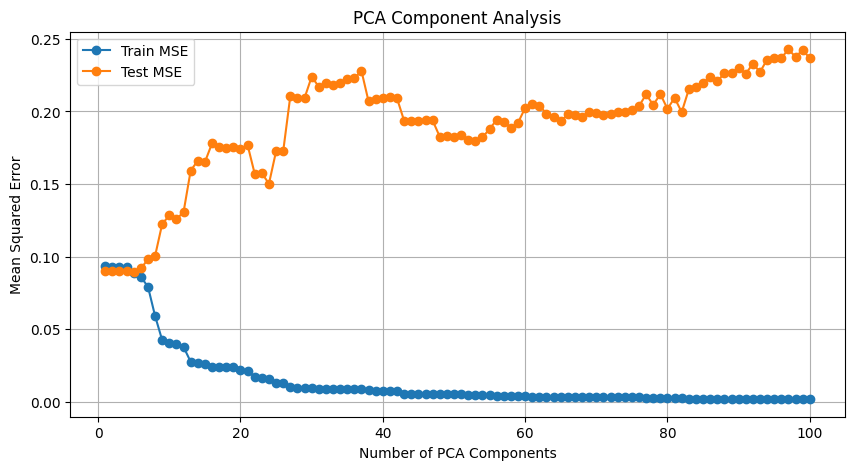

In [38]:
# Perform PCA for different numbers of components
pca_mses_train = []
pca_mses_test = []

for n_components in range(1, 101):
    pca = PCA(n_components=n_components)
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)

    # Create a LinearRegression model
    model = LinearRegression()

    # Fit the model to the training set
    model.fit(x_train_pca, y_train)

    # Predict y of train and test set
    y_train_pred = model.predict(x_train_pca)
    y_test_pred = model.predict(x_test_pca)

    # Calculate MSE of train and test set
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    pca_mses_train.append(mse_train)
    pca_mses_test.append(mse_test)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(range(1, 101), pca_mses_train, label='Train MSE', marker='o')
plt.plot(range(1, 101), pca_mses_test, label='Test MSE', marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('PCA Component Analysis')
plt.grid(True)
plt.show()

<span style="color: green;">
As you can see with 5 component we get the least error.
</span>